In [1]:

from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

%matplotlib inline  

import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm

In [2]:
class KMeans(object):
    
    def __init__(self): #No need to implement
        pass
    
    def pairwise_dist(self, x, y): # [5 pts]
        """
        Args:
            x: N x D numpy array
            y: M x D numpy array
        Return:
                dist: N x M array, where dist2[i, j] is the euclidean distance between 
                x[i, :] and y[j, :]
                """
        x2 = np.sum(x**2, 1)
        y2 = np.sum(y**2, 1)
        xy = x @ y.T
        d2 = -2 * xy + y2 + x2[:, np.newaxis]
        d2[d2 < 0] = 0
        return np.sqrt(d2)

    def _init_centers(self, points, K, **kwargs): # [5 pts]
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            kwargs: any additional arguments you want
        Return:
            centers: K x D numpy array, the centers. 
        """
        idx = np.random.randint(points.shape[0], size=K)
        return points[idx, :]

    def _update_assignment(self, centers, points): # [10 pts]
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            points: NxD numpy array, the observations
        Return:
            cluster_idx: numpy array of length N, the cluster assignment for each point
            
        Hint: You could call pairwise_dist() function.
        """
        dist = self.pairwise_dist(points, centers) #NxK
        return np.argmin(dist, 1)

    def _update_centers(self, old_centers, cluster_idx, points): # [10 pts]
        """
        Args:
            old_centers: old centers KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            centers: new centers, K x D numpy array, where K is the number of clusters, and D is the dimension.
        """
        weights = np.zeros((points.shape[0], old_centers.shape[0])) #NxK
        weights[np.arange(points.shape[0]), cluster_idx] = 1
        
        sums = np.einsum('NK,ND->KD', weights, points)
        return sums / np.sum(weights, 0)[:, np.newaxis]

    def _get_loss(self, centers, cluster_idx, points): # [5 pts]
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            loss: a single float number, which is the objective function of KMeans. 
        """
        chosen_centers = centers[cluster_idx, :] #NxD
        return np.sum((chosen_centers - points) ** 2)
        
    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, verbose=False, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations (Hint: You could change it when debugging)
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            verbose: boolean to set whether method should print loss (Hint: helpful for debugging)
            kwargs: any additional arguments you want
        Return:
            cluster assignments: Nx1 int numpy array
            cluster centers: K x D numpy array, the centers
            loss: final loss value of the objective function of KMeans
        """
        centers = self._init_centers(points, K, **kwargs)
        for it in range(max_iters):
            cluster_idx = self._update_assignment(centers, points)
            centers = self._update_centers(centers, cluster_idx, points)
            loss = self._get_loss(centers, cluster_idx, points)
            K = centers.shape[0]
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            if verbose:
                print('iter %d, loss: %.4f' % (it, loss))
        return cluster_idx, centers, loss
    
    def find_optimal_num_clusters(self, data, max_K=15): # [10 pts]
        """Plots loss values for different number of clusters in K-Means
        
        Args:
            image: input image of shape(H, W, 3)
            max_K: number of clusters
        Return:
            losses: an array of loss denoting the loss of each number of clusters
        """
        
        x = np.arange(1, max_K)
        y = np.zeros(x.shape)
        for i in range(max_K - 1):
            cluster_idx, centers, loss = self.__call__(data, i + 1)
            y[i] = loss
        fig = plt.figure()
        plt.plot(x, y)
        plt.show()
        return y

<Figure size 720x432 with 0 Axes>

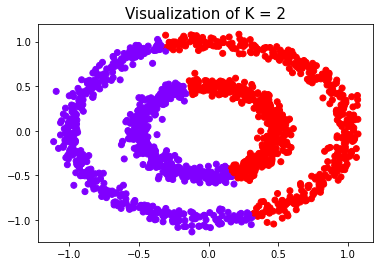

<Figure size 720x432 with 0 Axes>

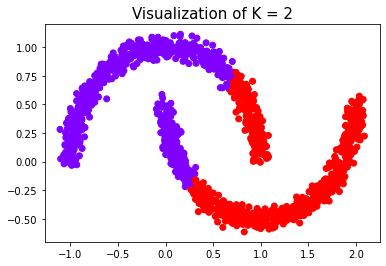

In [6]:
from sklearn.datasets import make_circles, make_moons

X1, y1 = make_circles(factor=0.5, noise=0.05, n_samples=1500)
X2, y2 = make_moons(noise=0.05, n_samples=1500)

def visualise(X, C, K):# Visualization of clustering. You don't need to change this function  
    plt.figure(figsize=(10,6)) 
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=C,cmap='rainbow')
    plt.title('Visualization of K = '+str(K), fontsize=15)
    plt.show()
    pass
    
cluster_idx1, centers1, loss1 = KMeans()(X1, 2)
visualise(X1, cluster_idx1, 2)

cluster_idx2, centers2, loss2 = KMeans()(X2, 2)
visualise(X2, cluster_idx2, 2)

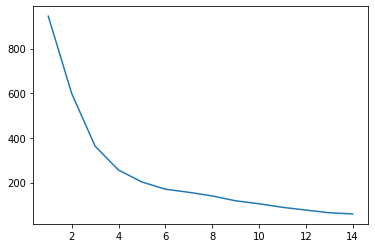

array([944.85730988, 598.82183134, 362.93341589, 255.77649644,
       202.43407292, 170.30353738, 156.31888553, 140.17906687,
       118.28182223, 105.02337359,  89.09633624,  76.72927047,
        64.68620858,  59.49341989])

In [7]:
KMeans().find_optimal_num_clusters(X1)

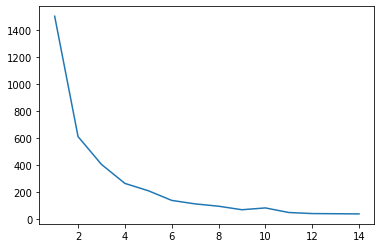

array([1501.32562739,  609.33183862,  403.497619  ,  262.92529971,
        208.56683492,  136.95867928,  111.0873067 ,   94.00590834,
         67.80588785,   81.27478737,   47.3227214 ,   39.45975834,
         38.28425063,   36.88079534])

In [8]:
KMeans().find_optimal_num_clusters(X2)

<Figure size 720x432 with 0 Axes>

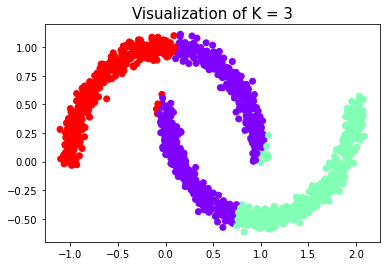

<Figure size 720x432 with 0 Axes>

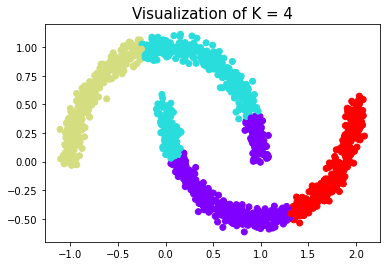

In [16]:
cluster_idx1, centers1, loss1 = KMeans()(X2, 3)
visualise(X2, cluster_idx1, 3)

cluster_idx2, centers2, loss2 = KMeans()(X2, 4)
visualise(X2, cluster_idx2, 4)

<Figure size 720x432 with 0 Axes>

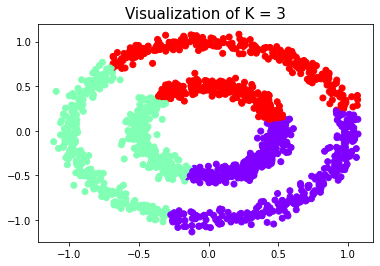

<Figure size 720x432 with 0 Axes>

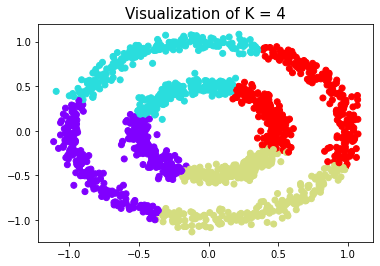

In [18]:
cluster_idx1, centers1, loss1 = KMeans()(X1, 3)
visualise(X1, cluster_idx1, 3)

cluster_idx2, centers2, loss2 = KMeans()(X1, 4)
visualise(X1, cluster_idx2, 4)